Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       18560     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 256)        

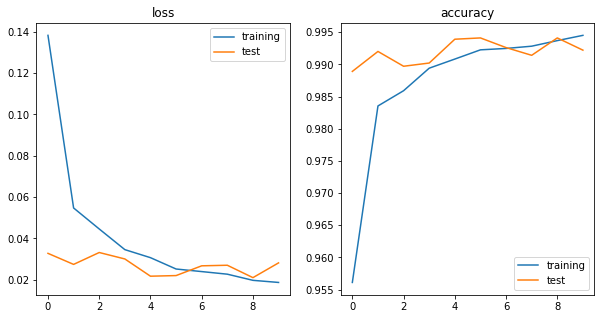

In [3]:

from keras.datasets import mnist
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import time


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


start_time = time.time()
'''
#7 学習の実行
history = model.fit(x_train, y_train, batch_size=1024, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))

#8 モデルの準備
score = model.evaluate(x_test, y_test, verbose= 0)
print("test loss:", score[0])
print("test accuracy:", score[1])
print("computation time:{0:.3f} sec".format(time.time()-start_time))
'''
###################################
#ヘルパーライブラリー
import numpy as np
import matplotlib.pyplot as plt
model.summary()

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

metrics = ['loss', 'accuracy']

plt.figure(figsize=(10,5))

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)
    plt.title(metric)

    plt_train = history.history[metric]
    plt_test = history.history['val_' + metric]

    plt.plot(plt_train, label='training')
    plt.plot(plt_test, label='test')
    plt.legend()


plt.show()